In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
import re
import pdb
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [55]:
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_plot(x, y):
  # for i in range(3):
  #   tmp_1 = np.append(x[1:], 0)
  #   x = (x[:-2] + tmp_1[:-2])/2

  # for i in range(3):
  #   tmp_1 = np.append(y[1:], 0)
  #   y = (y[:-2] + tmp_1[:-2])/2
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
  print(x,y)
  popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
  x = np.linspace(np.min(x),np.max(x),200)
  sns.set(rc={'figure.figsize': (16, 12)})
  sns.set_theme(style="whitegrid")
  dict = {'Dataset Size': x,
          'Rewards Difference': gauss(x, *popt)}
  data = pd.DataFrame(dict)
  print(popt)
  sns.lineplot(data=data, x='Dataset Size', y='Rewards Difference')
  plt.show()
  plt.close()


def raw_plot(x,y):
  sns.lineplot(x=x,y=y)




[  100   200   300   400   500   600   700   800   900  1000  1100  1200
  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400
  2500  2600  2700  2800  2900  3000  3100  3200  3300  3400  3500  3600
  3700  3800  3900  4000  4100  4200  4300  4400  4500  4600  4700  4800
  4900  5000  5100  5200  5300  5400  5500  5600  5700  5800  5900  6000
  6100  6200  6300  6400  6500  6600  6700  6800  6900  7000  7100  7200
  7300  7400  7500  7600  7700  7800  7900  8000  8100  8200  8300  8400
  8500  8600  8700  8800  8900  9000  9100  9200  9300  9400  9500  9600
  9700  9800  9900 10000] [1236.  838.  838.   37. 1232.  838.   36. 1238.  838.  838.   34.  838.
  838.   24.  838.  838. 1234.  838.   34.  838.   16.   10.   18.   12.
   35.   12.   11.  838.   11.    8.  838.   36.  838.   17.   26.   19.
   31.   11.   13.   18.    8.    4.    3.   10.   18.   34.   12.    8.
   27.   14.   20.   30.    6.   12.    5.    6.    8.   37.   23.   10.
  838.   12.    6.    4. 

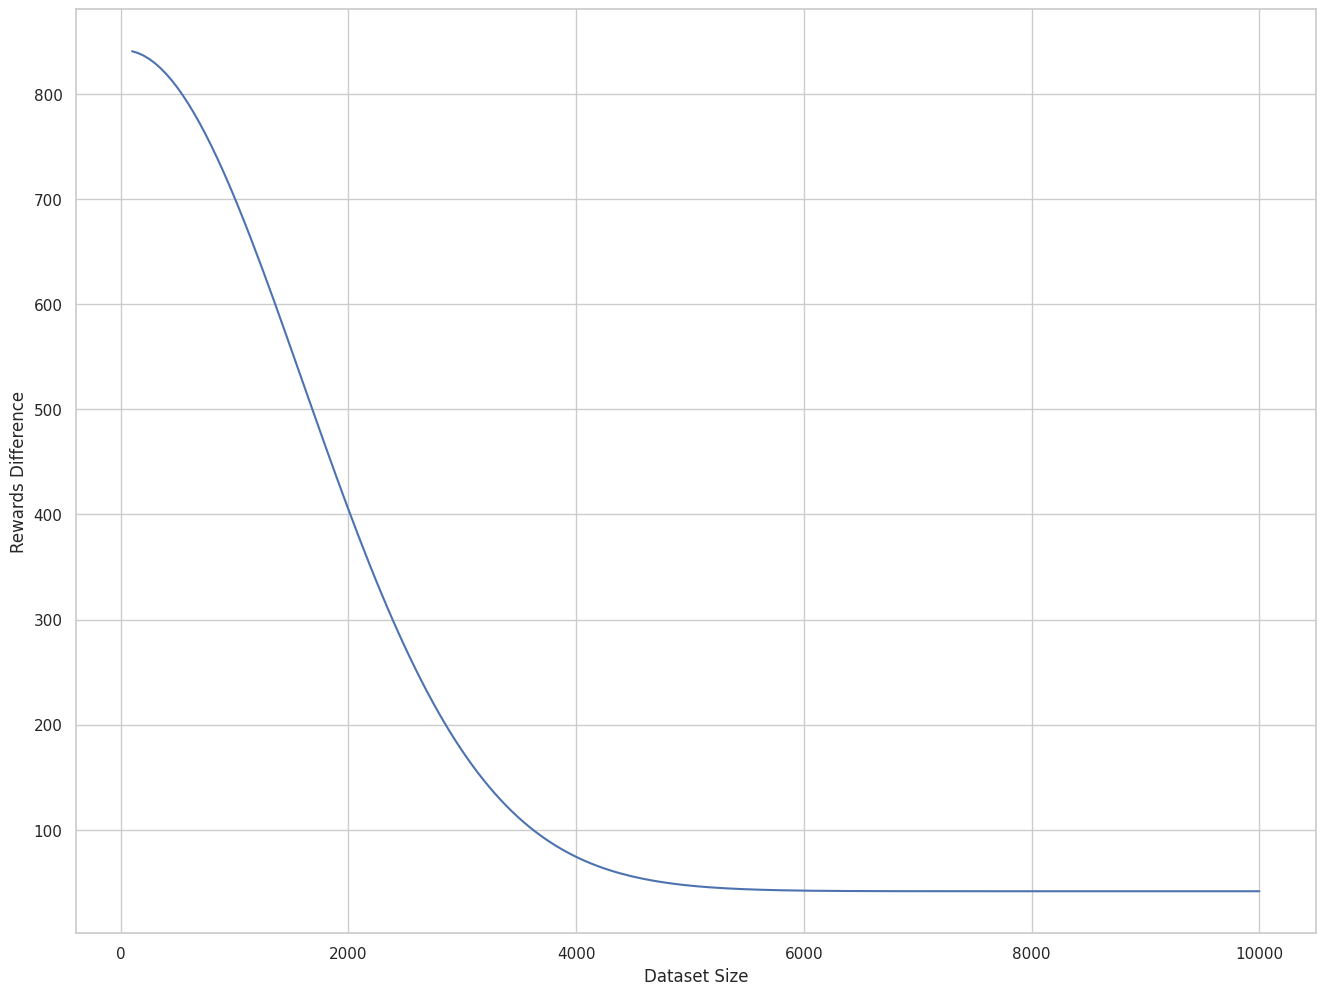

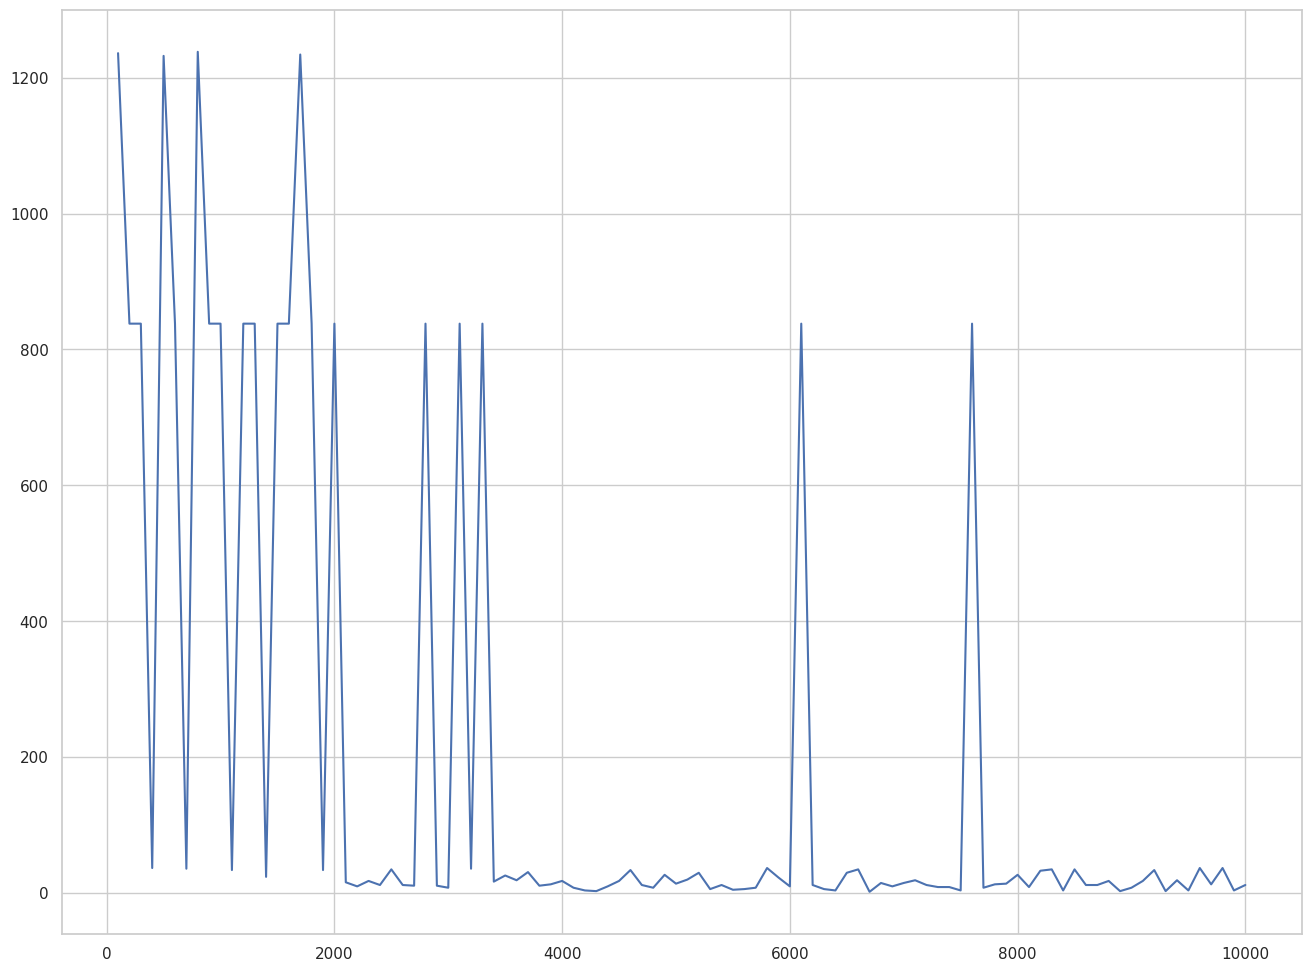

In [56]:

file = F"/content/drive/MyDrive/DRO_OfflineRL/DP_EXP/reward_diff_with_datasize.csv" 
y = np.abs(np.loadtxt(file, delimiter=','))
x = 100 + np.arange(100)*100
gauss_plot(x,y)
raw_plot(x,y)




[1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87
 0.86 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73
 0.72 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59
 0.58 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47 0.46 0.45
 0.44 0.43 0.42 0.41] [838.   9.  10.  13.   8.  38.  18.   9.  15.  23.  15.  31. 838. 838.
  28. 838.  37. 838.  38.  35. 838. 838. 838.  34. 838. 838. 838. 838.
 838. 838. 838. 838.  36. 838. 838. 838.  35. 838. 838. 838.  37. 838.
 838. 838. 838. 838. 838. 838. 838. 838. 838. 838. 838. 838. 838. 838.
 838. 838.  34. 838.]
[-4.10441334e+02  1.21166432e+03  5.59331334e-01  3.20130199e-01]


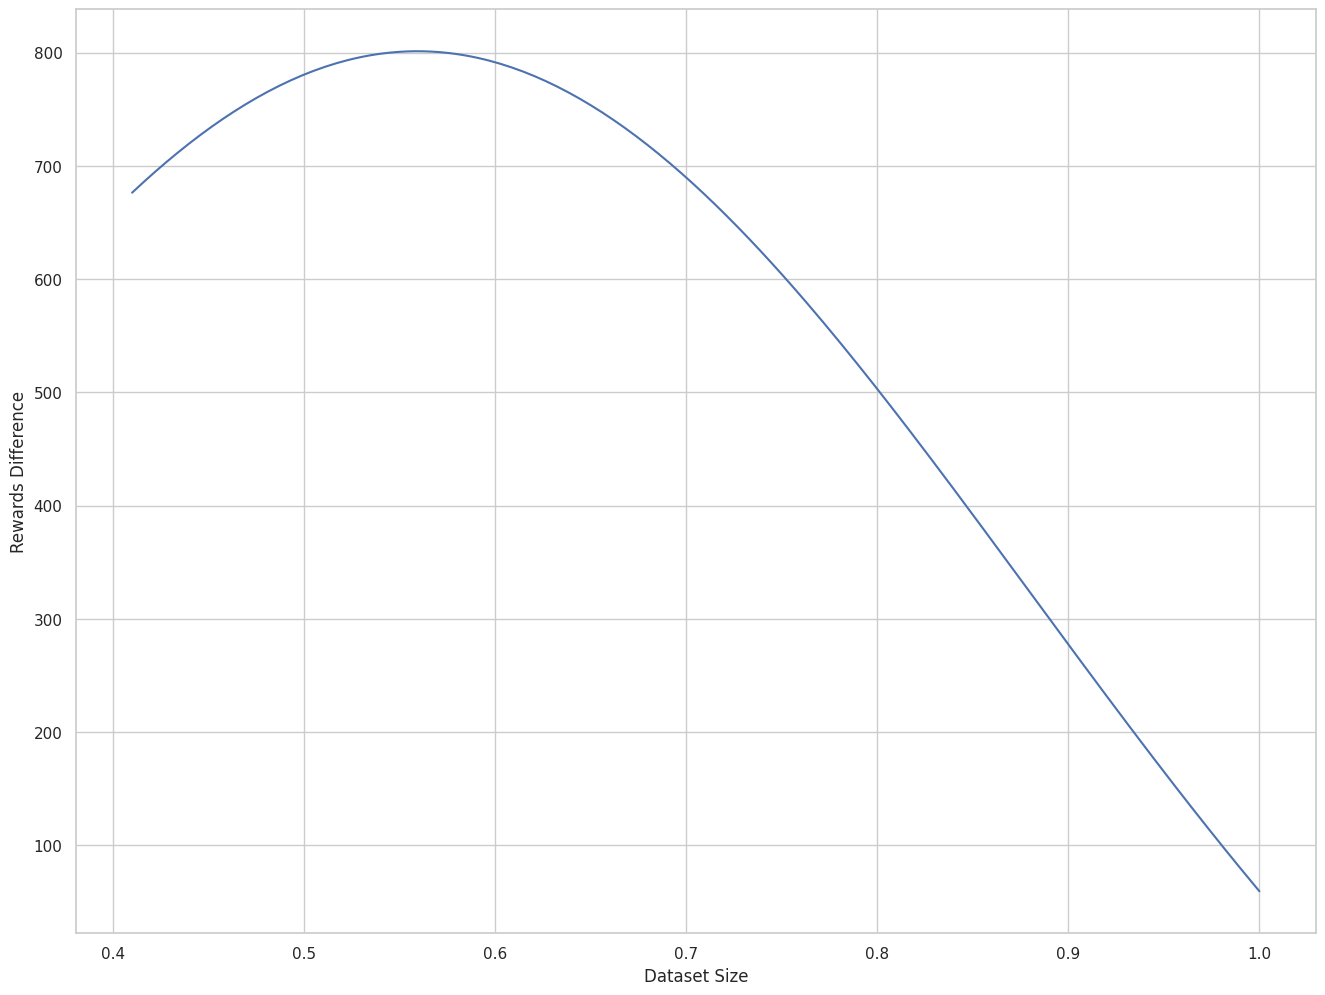

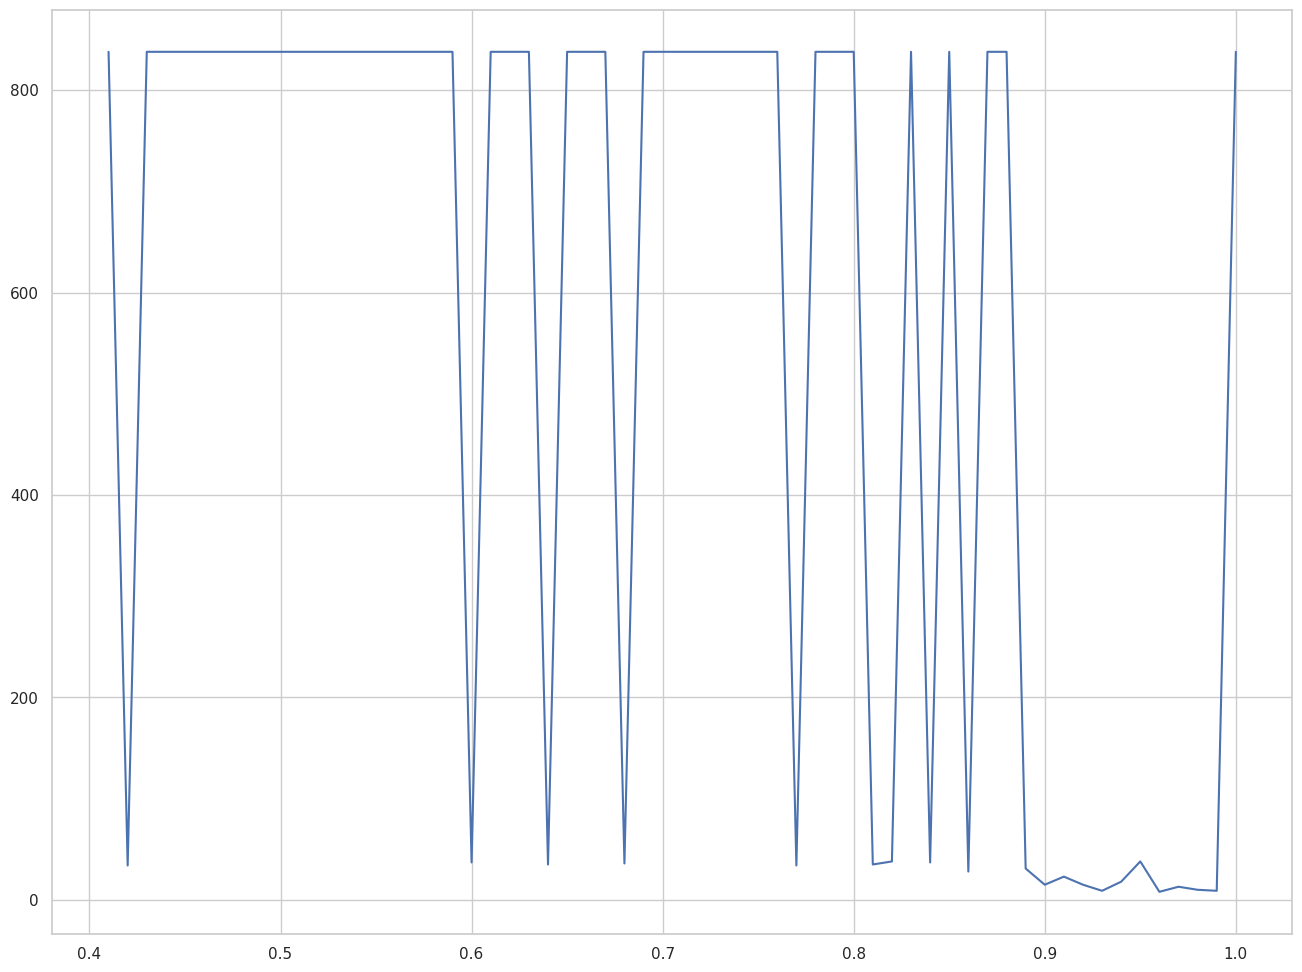

In [57]:
file = F"/content/drive/MyDrive/DRO_OfflineRL/DP_EXP/reward_diff_with_gamma.csv" 
y = np.abs(np.loadtxt(file, delimiter=','))
x = 1 - np.arange(60)*0.01
gauss_plot(x,y)
raw_plot(x,y)



[  100  5100 10100 15100 20100 25100 30100 35100 40100 45100] [1238.  838.  838.  838.   36.   18.   24.   14.   13.   20.]
[  -26.43421881  1170.06909267   116.8095423  12113.18887939]


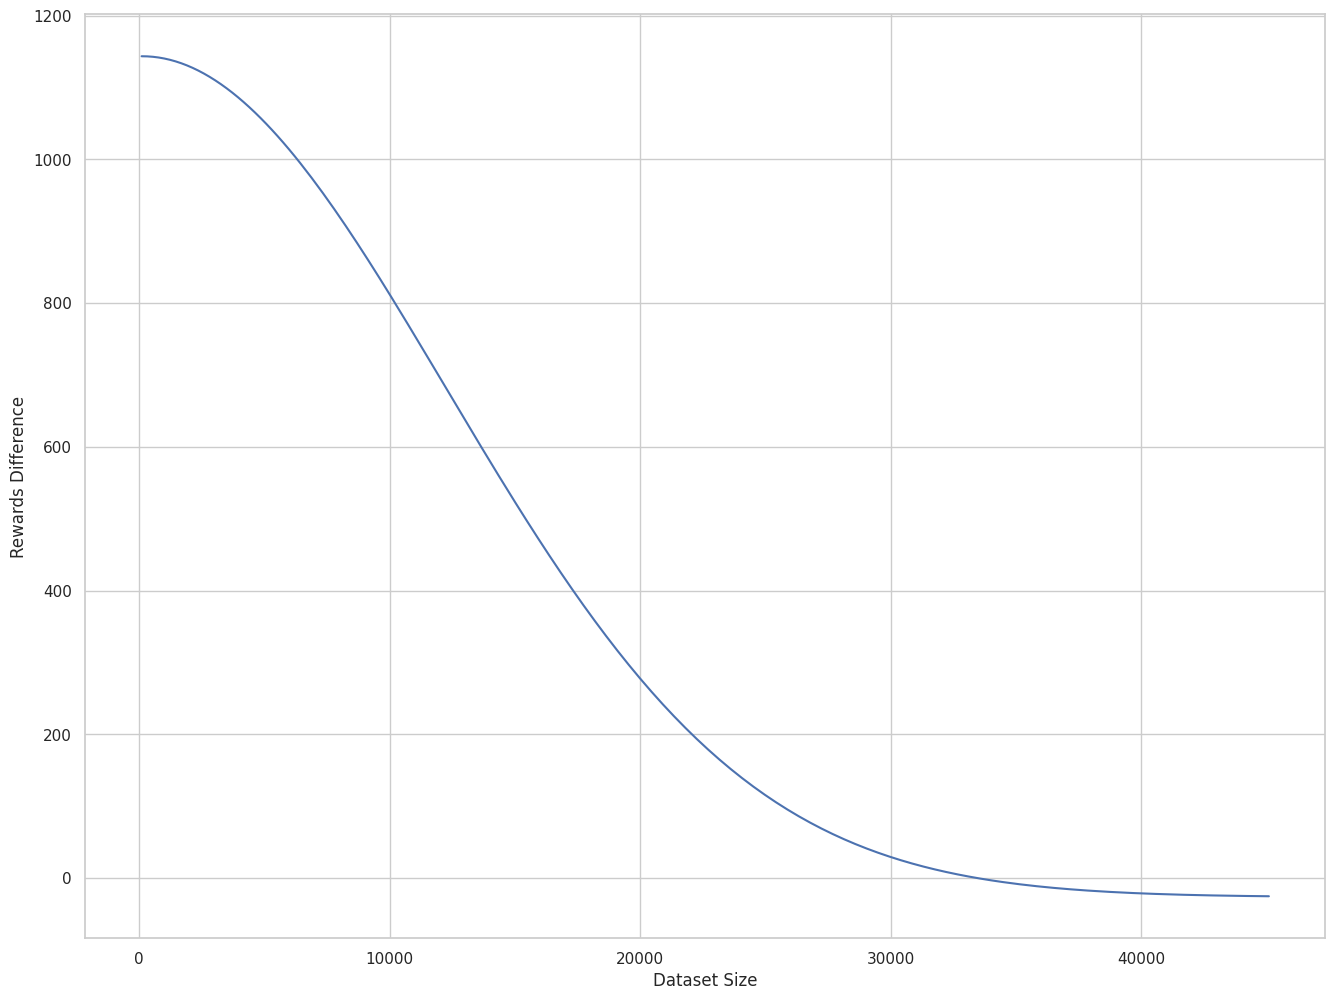

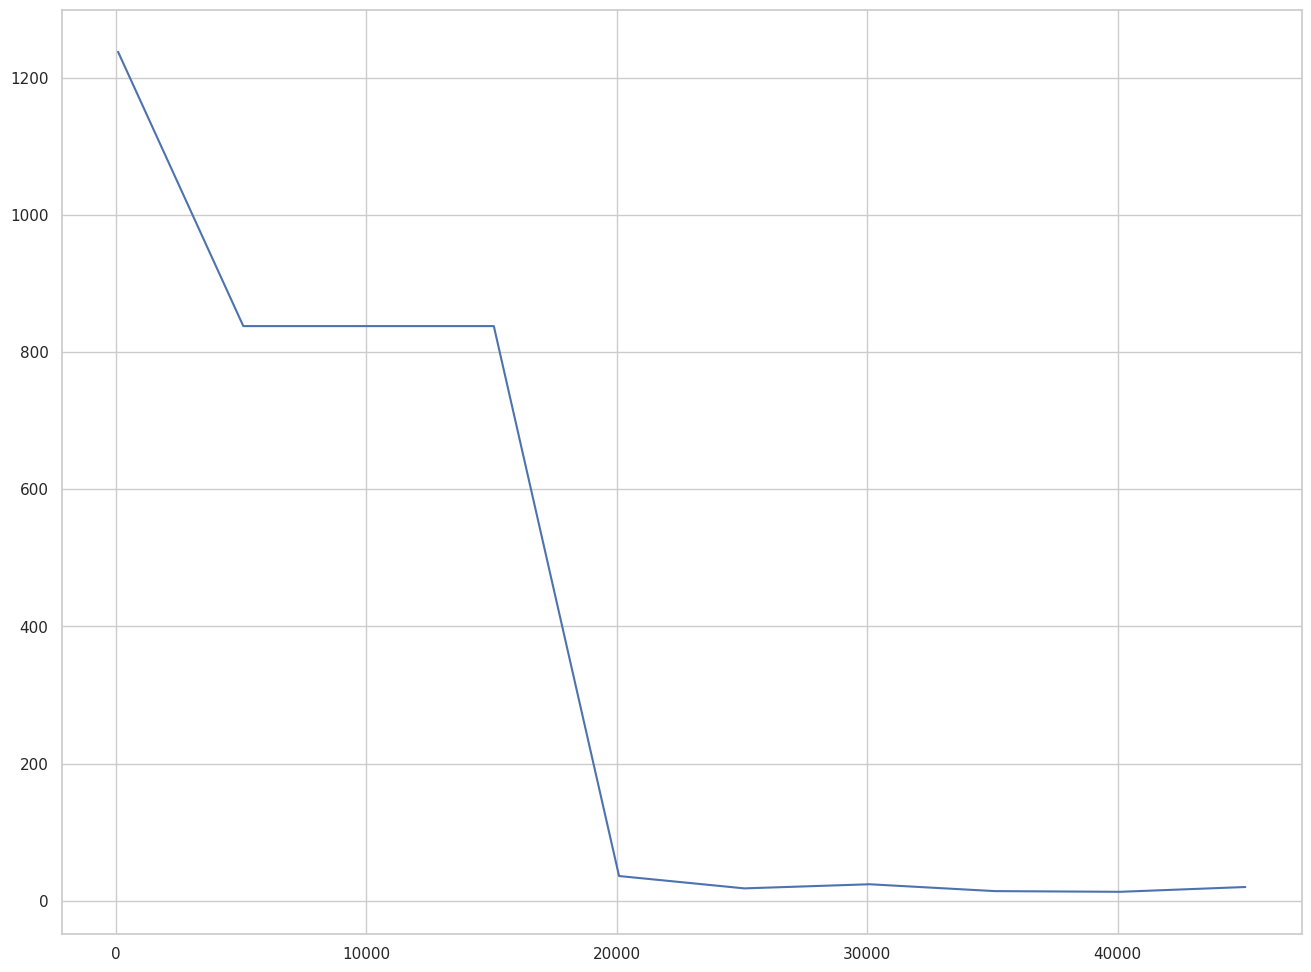

In [58]:

file = F"/content/drive/MyDrive/DRO_OfflineRL/DRO/reward_diff_with_datasize.csv" 
y = np.abs(np.loadtxt(file, delimiter=','))
x = 100 + np.arange(10)*5000
gauss_plot(x,y)
raw_plot(x,y)

In [62]:
def get_gauss_params(x,y):
  mean = sum(x * y) / sum(y)
  sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
  return [np.min(y), np.max(y), mean, sigma]

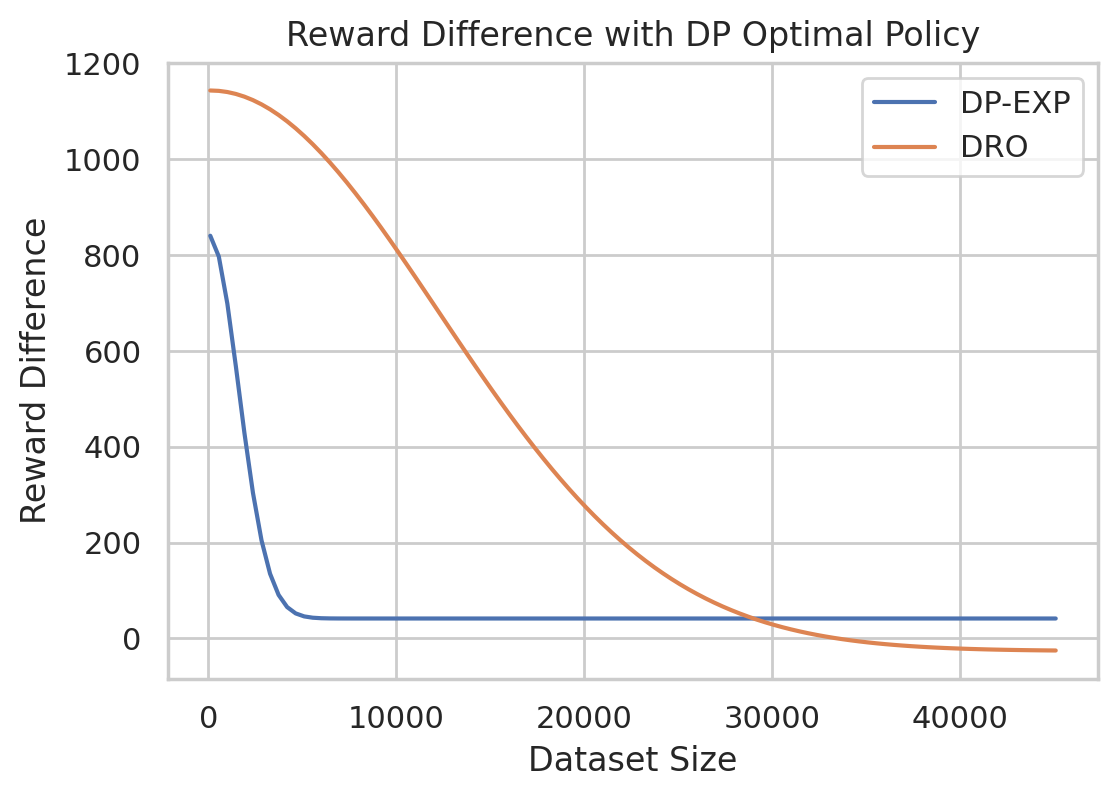

In [81]:
# Combine
file = F"/content/drive/MyDrive/DRO_OfflineRL/DP_EXP/reward_diff_with_datasize.csv" 
r_dp_exp = np.abs(np.loadtxt(file, delimiter=','))
d_dp_exp = 100 + np.arange(100)*100
params_dp_exp = get_gauss_params(d_dp_exp, r_dp_exp)
popt_dp_exp, pcov_dp_exp = curve_fit(gauss, d_dp_exp, r_dp_exp, p0=params_dp_exp)

file = F"/content/drive/MyDrive/DRO_OfflineRL/DRO/reward_diff_with_datasize.csv" 
r_dro = np.abs(np.loadtxt(file, delimiter=','))
d_dro = 100 + np.arange(10)*5000
params_dro = get_gauss_params(d_dro, r_dro)
popt_dro, pcov_dro = curve_fit(gauss, d_dro, r_dro, p0=params_dro)

min = np.min([np.min(d_dp_exp), np.min(d_dro)])
max = np.max([np.max(d_dp_exp), np.max(d_dro)])

x = np.linspace(min, max, 100)
plt.figure(figsize=(6, 4), dpi=200)
plt.title("Reward Difference with DP Optimal Policy")
plt.plot(x, gauss(x, *popt_dp_exp), label="DP-EXP")
plt.plot(x, gauss(x, *popt_dro), label="DRO")
plt.xlabel("Dataset Size")
plt.ylabel("Reward Difference")
plt.legend()
plt.show()

